# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [1]:


from zipfile import ZipFile
from urllib import request

In [2]:
file_url = 'https://github.com/msaricaumbc/DS601_Fall21/raw/main/Week06/data/lab_data.zip'
file_name = 'data.csv'
def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())
    
download_file(file_name, file_url)


In [3]:
!ls

PoliceShootingsUS.csv data.csv              week06_lab.ipynb
__MACOSX              volunteers.txt


In [4]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 

In [5]:
unzip(file_name)

File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!


## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [6]:
import pandas as pd
df=pd.read_csv('PoliceShootingsUS.csv')

In [7]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [8]:
len(df[df.age > 55]) #.value_counts())

235

* What's the age distribution?

<AxesSubplot:ylabel='Density'>

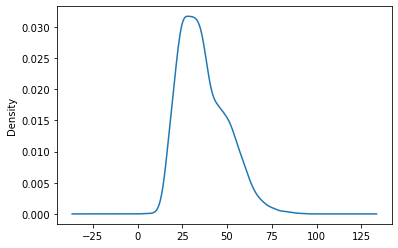

In [9]:
## Your code is here
import matplotlib.pyplot as plt
df.age.plot(kind='kde')
#plt.show()

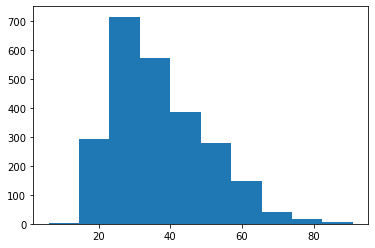

In [10]:
plt.hist(df.age)
plt.show()

## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [11]:
## Your code is here
!head volunteers.txt


"log"[Harding, Christine] (Virginia) - Universal human-resource flexibility
"log"[Davis, Kimberly] (New York) - Compatible demand-driven hub
"log"[Ingram, Rachel] (Louisiana) - Versatile multimedia website
"log"[Walker, Richard] (Oregon) - Networked eco-centric approach
"log"[Barnes, Francisco] (Virginia) - Persistent systematic moratorium
"log"[Perez, Rachel] (Alaska) - Optimized national portal
"log"[Choi, Linda] (Iowa) - Operative discrete Internet solution
"log"[Gomez, Janice] (Vermont) - Managed national attitude
"log"[Lloyd, Jesus] (Connecticut) - Adaptive systematic definition
"log"[Moore, Alicia] (Michigan) - Innovative motivating support


In [16]:
names = []
lastnames = []
states = []

with open('volunteers.txt', 'r') as my_file:
    
    lines = my_file.readlines()
    for line in lines:
        line = line \
                .replace('"' , ',') \
                .replace("[", ",") \
                .replace("]", ",") \
                .replace("(" , " ") \
                .replace(")" , " ") \
                .replace(" - ", ",")
        
        parts = line.split(',')
        lastname = parts[3].strip()
        name = parts[4].strip()
        state = parts[5].strip()

        names.append(name)
        lastnames.append(lastname)
        states.append(state)
        
    


In [17]:
!head volunteers.txt

"log"[Harding, Christine] (Virginia) - Universal human-resource flexibility
"log"[Davis, Kimberly] (New York) - Compatible demand-driven hub
"log"[Ingram, Rachel] (Louisiana) - Versatile multimedia website
"log"[Walker, Richard] (Oregon) - Networked eco-centric approach
"log"[Barnes, Francisco] (Virginia) - Persistent systematic moratorium
"log"[Perez, Rachel] (Alaska) - Optimized national portal
"log"[Choi, Linda] (Iowa) - Operative discrete Internet solution
"log"[Gomez, Janice] (Vermont) - Managed national attitude
"log"[Lloyd, Jesus] (Connecticut) - Adaptive systematic definition
"log"[Moore, Alicia] (Michigan) - Innovative motivating support


In [18]:

df = pd.DataFrame()
df['Name']= names
df['Lastname'] = lastnames
df['State'] = states

In [19]:
df

,Name,Lastname,State
0,Christine,Harding,Virginia
1,Kimberly,Davis,New York
2,Rachel,Ingram,Louisiana
3,Richard,Walker,Oregon
4,Francisco,Barnes,Virginia
...,...,...,...
95,Kevin,Smith,North Dakota
96,Mark,Moore,Alaska
97,Jennifer,Landry,Wyoming
98,Lori,Phillips,Arkansas
